# <span style='color:Yellow;;'>Semantic Kernel</span>

**Microsoft Semantic Kernel** is an open-source SDK that allows you to build AI agents that can call your existing code. 

It’s highly extensible and can be used with models from various sources, including OpenAI, Azure OpenAI, and Hugging Face and etc.

It allows you to interact with LLM and using our native code to perform domain specific tasks.

Currently this SDK is avaialbe in python, C# and Java. Features are varied depends on programming language.

It has various features to implement more complex scenarios by combining native code.

<b style='color:green;'>Current latest versions is : 1.5.0</b>

# Example
In this tutorial, we are going to use Azure OpenAI, and Semantic kernel to extract the users emotions based on product review.

## Approach
We will be using basic inline function style approach with parameters.

To perform this, we need to follow the steps in below order.

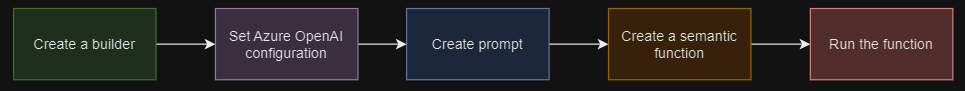

# Nuget package installation
```csharp
#r "nuget: Microsoft.SemanticKernel, 1.5.0"
```

In [ ]:
#r "nuget: Microsoft.SemanticKernel, 1.5.0"

In [ ]:
#r "nuget: DotNetEnv, 2.2.0"


# Get all Azure OpenAI resource related configurations from the Keys and Endpoint section from the left pane.
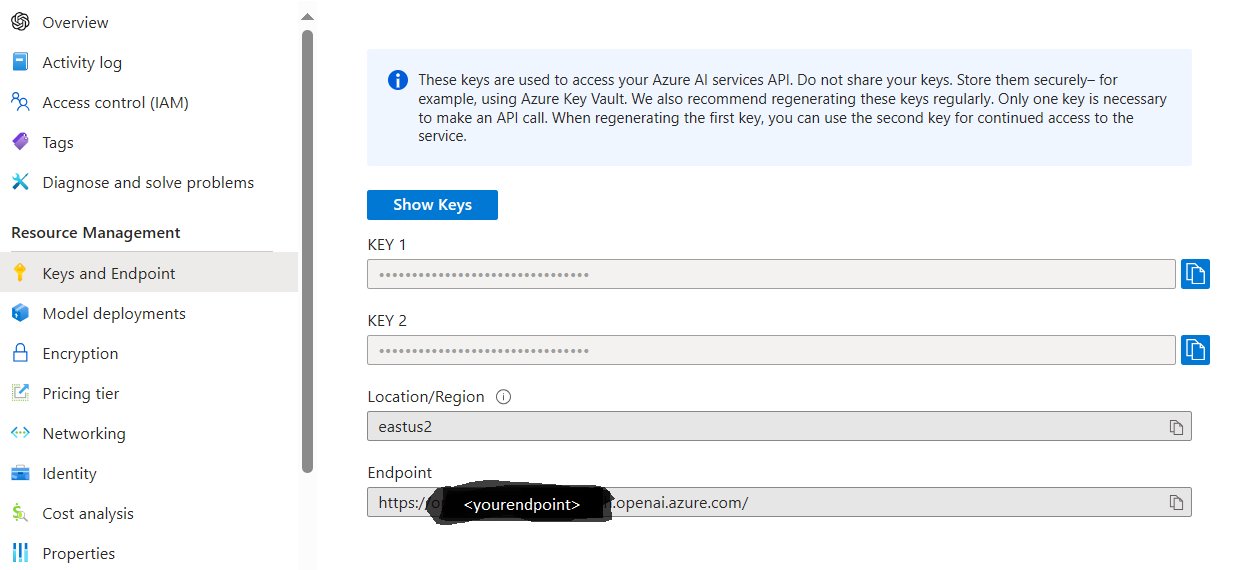

# And you can find model deployment name inside Azure OpenAI studio.

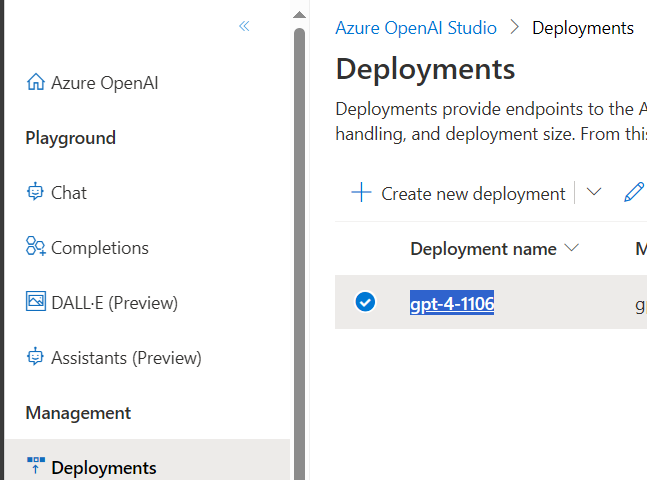

In [ ]:
using DotNetEnv;
Env.Load();
var endpoint = Environment.GetEnvironmentVariable("AOAIEndPoint");
var apikey = Environment.GetEnvironmentVariable("AOAIApiKey");
var deployementName = "gpt-4-1106";

In [ ]:
using Microsoft.SemanticKernel;
using Kernel = Microsoft.SemanticKernel.Kernel;

In [ ]:
//Create builder
var builder = Kernel.CreateBuilder();

In [ ]:
builder.AddAzureOpenAIChatCompletion(deployementName,endpoint,apikey);
var kernel = builder.Build();

In [ ]:
var userPromptTemplate=@"
You are a AI intelligent system, who is specilized to extract to user emotion based on product review.
The emotions can be
-Angry
-Happy
-Needs improvement

If you are not able to extract the emotion from above, just say 'Sorry, could not be to identify the emotion. Please enter full user review with more details.'
You should not answer anything other than Emotion extractions.

**ProductReview**
{{$userInput}}

**Assistant:**
Emotion:[extracted emotion]
Reason:[Thougth process in 2 paragraph. Pointwise explanation is preferred]
How To solve this :[your idea to solve this. Pointwise explanation is preferred]
 
";

In [ ]:
// var userInput = "I have wasted my money on this faulty product.";

var userInput = "The product is good, but post sales services are bad";

// var userInput = "how to create C# console application";




In [ ]:
var reviewFunction = kernel.CreateFunctionFromPrompt(userPromptTemplate);


var args= new KernelArguments();


args.Add("userInput",userInput);

In [ ]:
var emotionResults = await kernel.InvokeAsync(reviewFunction,args);

In [ ]:
var results = emotionResults.ToString();

In [ ]:
var emotionResultsstreaming = kernel.InvokeStreamingAsync(reviewFunction,args);

await foreach(var text  in emotionResultsstreaming)
{
    Console.Write(text);
}